## PRACTICAL :: Social Media Analysis


Black Panther was an exceptionally successful movie by hitting 1 billion USD at Global Box Office. This movie had one of the greatest online engagement in Twitter's history, more than 5 million tweets within a month.

How did you feel about the movie? Did you share your thoughts on social media? How can we understand sentiments behind those thoughts?

1. Connect to Twitter API and extract tweets
2. Basic sentiment analysis
3. Basic visualisation

## Connect to Twitter API and extract tweets

1. How can we connect to Twitter API?
2. How can we extract tweets of a particular hashtag?
3. What is the structure of a tweet?
4. How can we extract more information about a tweet?

tweepy is a python library which we can use to connect to Twitter and extract tweets. Store Twitter application's credentials in variables. Write a function to connect to Twitter API.

In [1]:
# import required libraries
import tweepy           # To access and consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# Twitter App access keys

# Consume:
CONSUMER_KEY    = '???'
CONSUMER_SECRET = '???'

# Access:
ACCESS_TOKEN  = '???'
ACCESS_SECRET = '???'

# API's setup:
def connectToTwitterAPI():
    """
    Utility function to setup the Twitter's API
    with access keys.
    """
    # Authentication and access using keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication
    api = tweepy.API(auth)
    return api

Call the function and connect to Twitter API. Extract Tweets using a search term. In this example we use a hashtag to search for specific tweets.

In [3]:
# Create an extractor object
extractor = connectToTwitterAPI()

# Specify search criteria and extract tweets into a list
tweets = extractor.search(q="#BlackPanther", lang = "en", count=50)

# Print the total number of extracted tweets
print("Number of tweets extracted: {}.\n".format(len(tweets)))

Number of tweets extracted: 46.



Print the most recent 5 tweets and observe the nature of extracted tweets.

In [5]:
# Print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

5 recent tweets:

RT @GunnerBallZ: Black Panther &amp; The Hulk will be absolutely vital in Arsenal’s Endgame this season. 🙅🏾‍♂️🧤 #arsenal #kolasinac #aubameyang…

RT @THR: In his audition, @Winston_Duke transformed the way the #BlackPanther character M'Baku was originally imagined https://t.co/mzkAiGL…

‘Avengers: Infinity War’ Directors Took a Back Seat to ‘Black Panther’ Cast for Wakanda Scenes.
#Avengers… https://t.co/z1d79LyZD0

RT @GunnerBallZ: Black Panther &amp; The Hulk will be absolutely vital in Arsenal’s Endgame this season. 🙅🏾‍♂️🧤 #arsenal #kolasinac #aubameyang…

RT @Lupita_Nyongo: The real King and Queen x #WakandaForever. #BlackPanther #FanArtFriday by @Chuck_Styles https://t.co/PqZSawwtrP



Data frames are useful to store data in tableau format. Create a data frame and store relavant data from each tweet. Display the first 10 tweets stored in the data frame in table format.

In [6]:
# Create a pandas dataframe
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Add relavant data from each tweet
data['len']  = np.array([len(tweet.text) for tweet in tweets]) #textual content legnth
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets]) #likes counts
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets]) #retweets count

# Display the first 10 elements of the dataframe
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106888892890910721,2019-03-16 12:04:11,Twitter for iPhone,0,15
1,"RT @THR: In his audition, @Winston_Duke transf...",140,1106888862528430081,2019-03-16 12:04:04,Twitter for Android,0,121
2,‘Avengers: Infinity War’ Directors Took a Back...,130,1106888786074583040,2019-03-16 12:03:46,Twitter for iPhone,0,0
3,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106888376479825921,2019-03-16 12:02:08,Twitter for Android,0,15
4,RT @Lupita_Nyongo: The real King and Queen x #...,130,1106888300160258048,2019-03-16 12:01:50,Twitter for iPhone,0,1311
5,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106887927051759618,2019-03-16 12:00:21,Twitter for Android,0,15
6,"RT @THR: In his audition, @Winston_Duke transf...",140,1106887918256300032,2019-03-16 12:00:19,Twitter for iPhone,0,121
7,February Mailbag episode! Bringing Home The Go...,126,1106887904511561728,2019-03-16 12:00:16,Buffer,0,0
8,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106887715147186176,2019-03-16 11:59:30,Twitter for iPhone,0,15
9,RT @PastorGooner: Getting in on all the #Black...,140,1106887460250943488,2019-03-16 11:58:30,Twitter for Android,0,7


Extract the most liked tweet and the most retweeted tweet.

In [7]:
 # Extract the tweet with the highest number of likes and retweets

maxLikes = np.max(data['Likes'])
maxRetweets  = np.max(data['RTs'])

fav = data[data.Likes == maxLikes].index[0]
rt  = data[data.RTs == maxRetweets].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(maxLikes))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(maxRetweets))

The tweet with more likes is: 
Black Panther &amp; The Hulk will be absolutely vital in Arsenal’s Endgame this season. 🙅🏾‍♂️🧤 #arsenal #kolasinac… https://t.co/u0WfMJRYOf
Number of likes: 44
The tweet with more retweets is: 
RT @seadk6: 💥💥 Get in! Big effort on both ends of the pitch tonight, quarter-finals here we are! 👊🏼 #BlackPanther aka @Aubameyang7 is there…
Number of retweets: 2899


## Basic Sentiment Analysis

1. Use Textblob python library to classify polarity of a tweet
2. Compute the sentiment for each tweet


We can determine whether a tweet is positive, negative or neutral using sentiment analysis. Textblob library provides a simple API to support sentiment analysis. It has an already trained analyzer to classify the polarity of a given text. We define two functions in the following code. One to pre-process and clean the tweet content and the other to compute the sentiment associated with each tweet.

In [8]:
from textblob import TextBlob
import re

def cleanTweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyseSentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(cleanTweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

Compute sentiment for each tweet and add it to the data frame we created previously.

In [9]:
# Compute sentiment for each tweet and add the result into a new column
data['Sentiment'] = np.array([ analyseSentiment(tweet) for tweet in data['Tweets'] ])

# Display the first 10 elements of the dataframe
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment
0,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106888892890910721,2019-03-16 12:04:11,Twitter for iPhone,0,15,-1
1,"RT @THR: In his audition, @Winston_Duke transf...",140,1106888862528430081,2019-03-16 12:04:04,Twitter for Android,0,121,1
2,‘Avengers: Infinity War’ Directors Took a Back...,130,1106888786074583040,2019-03-16 12:03:46,Twitter for iPhone,0,0,-1
3,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106888376479825921,2019-03-16 12:02:08,Twitter for Android,0,15,-1
4,RT @Lupita_Nyongo: The real King and Queen x #...,130,1106888300160258048,2019-03-16 12:01:50,Twitter for iPhone,0,1311,1
5,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106887927051759618,2019-03-16 12:00:21,Twitter for Android,0,15,-1
6,"RT @THR: In his audition, @Winston_Duke transf...",140,1106887918256300032,2019-03-16 12:00:19,Twitter for iPhone,0,121,1
7,February Mailbag episode! Bringing Home The Go...,126,1106887904511561728,2019-03-16 12:00:16,Buffer,0,0,1
8,RT @GunnerBallZ: Black Panther &amp; The Hulk ...,144,1106887715147186176,2019-03-16 11:59:30,Twitter for iPhone,0,15,-1
9,RT @PastorGooner: Getting in on all the #Black...,140,1106887460250943488,2019-03-16 11:58:30,Twitter for Android,0,7,1


## Basic Visualization

1. Calculate percentages of positive, neutral and negative tweets
2. Plot percentages in a pie chart

In [10]:
# Construct lists with classified tweets

positiveTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0]
neutralTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
negativeTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data["Sentiment"][index] < 0]

# Calculate percentages

positivePercent = len(positiveTweets)*100/len(data['Tweets'])
neutralPercent = len(neutralTweets)*100/len(data['Tweets'])
negativePercent = len(negativeTweets)*100/len(data['Tweets'])

# Print percentages

print("Percentage of positive tweets: {}%".format(positivePercent))
print("Percentage of neutral tweets: {}%".format(neutralPercent))
print("Percentage de negative tweets: {}%".format(negativePercent))

Percentage of positive tweets: 39.130434782608695%
Percentage of neutral tweets: 23.91304347826087%
Percentage de negative tweets: 36.95652173913044%


Plot sentiment percentages in a pie chart

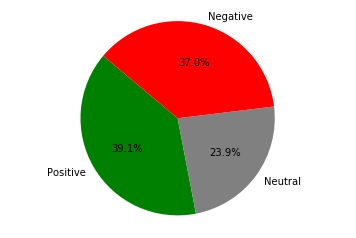

In [11]:
# For plotting and visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

labels = ['Positive', 'Neutral', 'Negative']
sizes = [positivePercent, neutralPercent, negativePercent]

# Set different colors
colors = ['green', 'grey', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

## Challenge Scenario

Here's a challenge for those who are interested in further analysis.

"Warner Bros. Movie World Gold Coast Theme Park is considering to introduce Marvel heroes apart from their existing DC heroes like Superman, Batman, and Wonder Woman. They plan to start from Black Panther super heroes as the movie was an exceptional success. What characters would you recommend from the Black Panther movie?"